In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (12, 9)

# Assignment 1

**IMPORTANT**: When finished all problems, rerun your entire notebook by clicking `Kernel > Restart Kernel and Run All Cells` to make sure your notebook runs correctly.

## 1. Sequential Labeling

In this problem, you will implement a system that labels objects in binary images and compute their geometric properties.

Let's first load our sample image and display it.

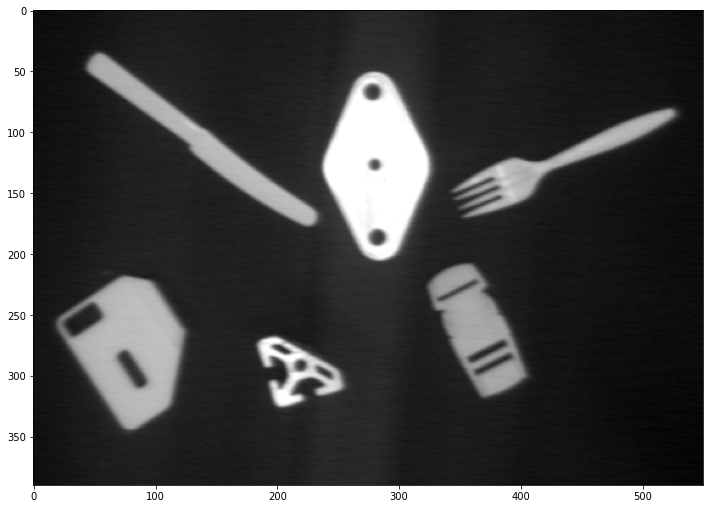

In [2]:
img = plt.imread('many_objects_2.png')

plt.imshow(img, cmap='gray')
plt.show()

In [3]:
img.shape

(390, 550)

In [4]:
imgC = img.copy()

In [5]:
imgC[imgC > imgC.max()/2] = True
imgC[imgC <= imgC.max()/2] = False

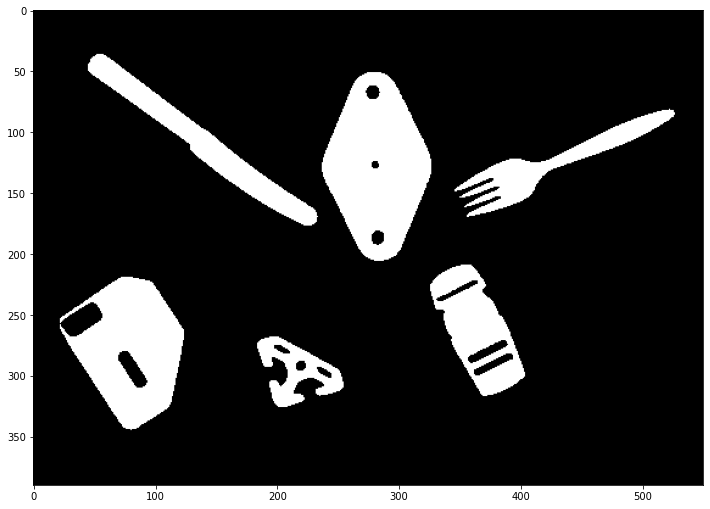

In [6]:
plt.imshow(imgC, cmap='gray')
plt.show()

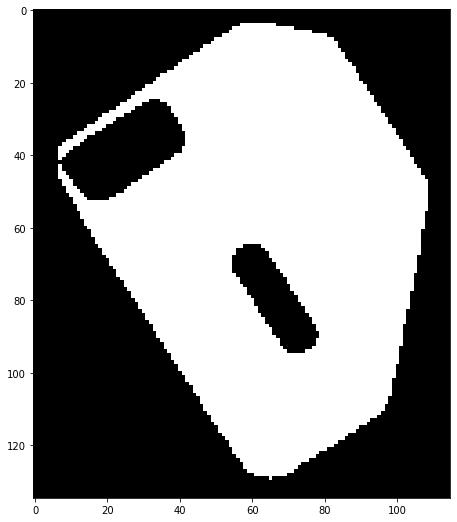

In [7]:
plt.imshow(imgC[215:350, 15:130], cmap='gray')
plt.show()

### 1a. Image Binarization (10 points)

Implement the following function that converts a grayscale image to a binary one by thresholding the pixel intensities. Each element in the output array must be a Boolean value where `True` indicates that the intensity of the corresponding pixel in the input is greater than or equal to the threshold value. You should be able to implement this without using `for`-loops.

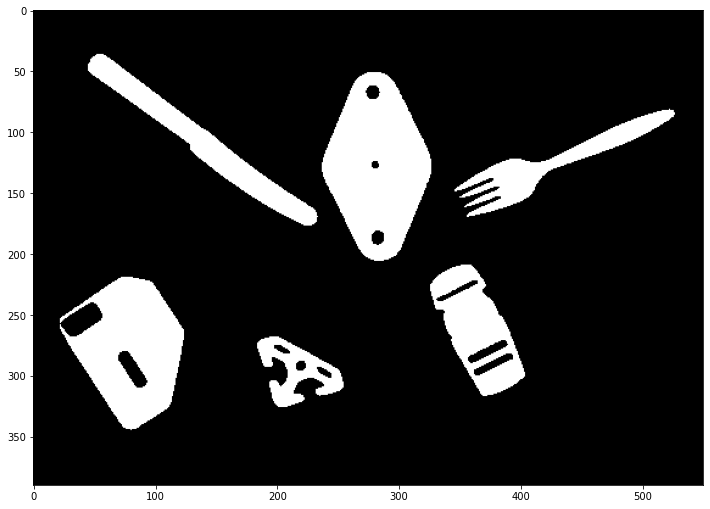

In [8]:
def binarize(gray_img, thresh_val):
    """Converts a grayscale image to a binary image by thresholding.
    Args:
    - gray_img: H x W array representing a grayscale image.
    - thresh_val: Threshold value.
    
    Returns:
    - binary_img: H x W Boolean array representing the thresholded image.
    """

    gray_img[gray_img > thresh_val] = True
    gray_img[gray_img <= thresh_val] = False

    return gray_img

binary_img = binarize(img, thresh_val=0.5)
plt.imshow(binary_img, cmap='gray')
plt.show()

In [9]:
# np.unique(binary_img)

In [10]:
# crit = [0, 1, 5]
# if 0 in crit:
#   print('0 is in array')

In [11]:
# zeros = [0, 9, 0]
# check = [x for x in zeros if x == 0]
# len(check)

### 1b. Label Connected Regions (30 points)

Implement the sequential labeling algorithm in the following function. The function takes a binary image as input and returns an array of the same size. The output array should have data type `int`, where each element is an object label. For example, all background pixels have value 0, all pixels of object 1 has value 1, etc.

Recall from the slides that you may want to do the labeling in two passes. In the first pass, pixels are assigned labels based on the labels of their neighbors. (Be careful when handling pixels near the image boundaries.) This labeling process may result in the same area having multiple labels, which is resolved in the second pass. You are free to choose how to resolve equivalent labels. The union-find data structure is especially suitable for this purpose. If you want to implement helper classes or functions, feel free to add them outside the function body.

In [12]:
bCopy = binary_img.copy()
label = 49
boundary = 0
for i in range(bCopy.shape[0]):
  for j in range(bCopy.shape[1]):
    neighbors = []
    if i == 0 and j == 0:# top left corner
      continue
    elif i == 0:
     neighbors.append([bCopy[i, j-1]])
    elif j == 0 and i != 0:
      neighbors.append([bCopy[i-1, j]])
    elif i == bCopy.shape[0]-1 and j == 0:# bottom left corner
      neighbors.append([bCopy[i-1, j]])
    else:# all middle pixels
      neighbors.append([bCopy[i, j-1], bCopy[i-1, j], bCopy[i-1, j-1]])

    checkZeros = [x for x in neighbors[0] if x == 0]
    if ((len(checkZeros)==1) and (bCopy[i, j] == 1)) or ((len(checkZeros)==2) and (bCopy[i, j] == 1)):
      bCopy[i, j] = 1000
    elif (sum(neighbors[0]) == 0) and (bCopy[i, j] == 1):# new label
      boundary += 1
      bCopy[i, j] = label
      if boundary == 40:
        label += 1
        boundary = 0
    elif (sum(neighbors[0]) != 0) and (bCopy[i, j] == 1):
      min_ = min([x for x in neighbors[0] if x != 0])
      bCopy[i, j] = min_

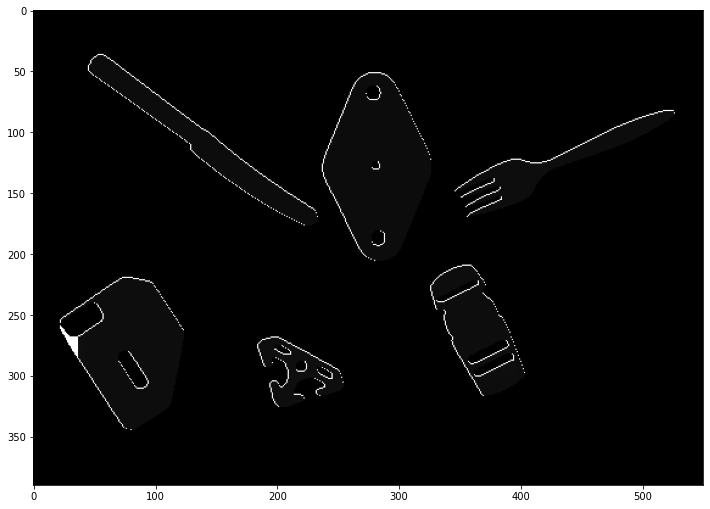

In [13]:
plt.imshow(bCopy, cmap='gray')
plt.show()

In [14]:
# len(np.unique(bCopy))

In [15]:
# np.unique(bCopy)

In [16]:
bCopy = binary_img.copy()

for i in range(bCopy.shape[0]):
  for j in range(bCopy.shape[1]):
    neighbors = []
    if i == 0 and j == 0:# top left corner
      continue
    elif i == 0:
     neighbors.append([bCopy[i, j-1]])
    elif j == 0 and i != 0:
      neighbors.append([bCopy[i-1, j]])
    elif i == bCopy.shape[0]-1 and j == 0:# bottom left corner
      neighbors.append([bCopy[i-1, j]])
    else:# all middle pixels
      neighbors.append([bCopy[i, j-1], bCopy[i-1, j], bCopy[i-1, j-1]])

    checkZeros = [x for x in neighbors[0] if x == 0]
    checkOnes = [x for x in neighbors[0] if x == 1]
    if len(checkZeros) >= 1 and bCopy[i, j] == 1:
      bCopy[i, j] = 1000
    elif len(checkOnes) >= 1 and bCopy[i, j] == 0:
      bCopy[i-1, j] = 1000
      bCopy[i, j-1] = 1000
      bCopy[i-1, j-1] = 1000

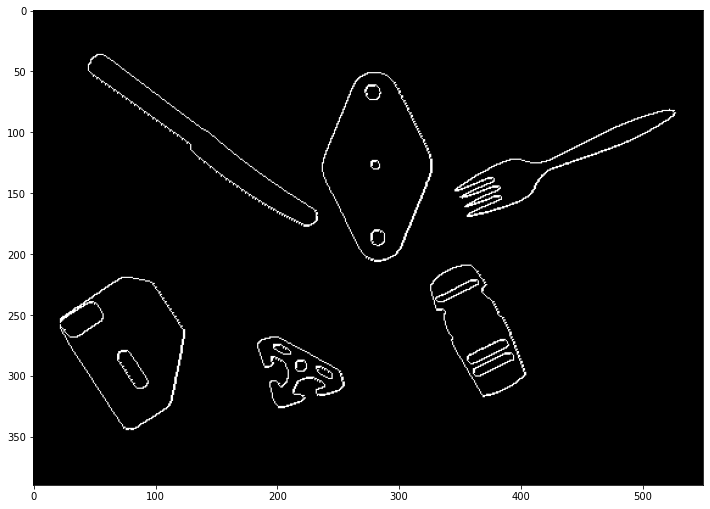

In [17]:
plt.imshow(bCopy, cmap='gray')
plt.show()

In [18]:
# np.unique(bCopy)

In [19]:
# plt.imshow(bCopy[60:75, 270:290], cmap='gray')
# plt.show()

In [23]:
# import pandas as pd
# pd.DataFrame(bCopy[60:75, 270:290])

In [24]:
for i in range(bCopy.shape[0]):
  for j in range(bCopy.shape[1]):
    if bCopy[i, j] == 1:
      bCopy[i, j] = 250

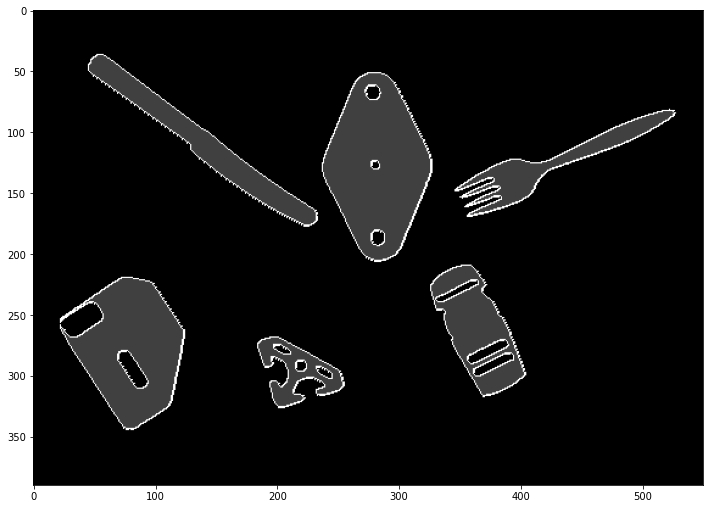

In [25]:
plt.imshow(bCopy, cmap='gray')
plt.show()

In [26]:
# print(len(np.unique(bCopy)))
# print(np.unique(bCopy))

In [27]:
# label = 50
# boundary = 0
# for i in range(bCopy.shape[0]):
#   for j in range(bCopy.shape[1]):
#     neighbors = []
#     if i == 0 and j == 0:# top left corner
#       continue
#     elif i == 0:
#      neighbors.append([bCopy[i, j-1]])
#     elif j == 0 and i != 0:
#       neighbors.append([bCopy[i-1, j]])
#     elif i == bCopy.shape[0]-1 and j == 0:# bottom left corner
#       neighbors.append([bCopy[i-1, j]])
#     else:# all middle pixels
#       neighbors.append([bCopy[i-1, j-1], bCopy[i-1, j], bCopy[i, j-1]])

#     # boundary_pix = [x for x in neighbors[0] if x != 0 and x != 1000]
#     # if bCopy[i, j] == 250 and bCopy[i, j] != 1000 and len(boundary_pix) >= 1:
#     #   old_labs = [x for x in neighbors[0] if x != 0 and x != 1000]
#     #   bCopy[i, j] = min(old_labs)
#     # elif bCopy[i, j] == 250 and len([x for x in neighbors[0] if x == 1000]) == 1:
#     #   bCopy[i, j] = label
#     #   boundary += 1
#     #   if boundary == 2:
#     #     label += 1
#     #     boundary = 0

#     if bCopy[i, j] == 1000:
#       boundary += 1
#       if boundary < 3:
#         bCopy[i, j] = label
#       else:
#         label += 1
#         bCopy[i, j] = label
#         boundary = 0
      
# a correction could be done here -- if pixel is neither 0 or 1000 then use old 
# labels, new double for-loop will account for 8 cells instead of 3 and will
# choose the minimum, but the min will always be top left of current

In [28]:
# plt.imshow(bCopy, cmap='gray')
# plt.show()

In [29]:
# print(len(np.unique(bCopy)))
# print(np.unique(bCopy))

In [30]:
# label = 2
# boundary = 0
# for i in range(bCopy.shape[0]):
#   for j in range(bCopy.shape[1]):
#     neighbors = []
#     if i == 0 and j == 0:# top left corner
#       continue
#     elif i == 0:
#      neighbors.append([bCopy[i, j-1]])
#     elif j == 0 and i != 0:
#       neighbors.append([bCopy[i-1, j]])
#     elif i == bCopy.shape[0]-1 and j == 0:# bottom left corner
#       neighbors.append([bCopy[i-1, j]])
#     else:# all middle pixels
#       neighbors.append([bCopy[i-1, j-1], bCopy[i-1, j], bCopy[i, j-1]])
    
#     if bCopy[i, j] == 250 and len([x for x in neighbors[0] if x != 1000]) >= 1:
#       bCopy[i, j] = label
#       label += 1
#     elif bCopy[i, j] == 250:
#       inner_pixels = [x for x in neighbors[0] if x != 1000 and x != 0]
#       if len(inner_pixels) > 0:
#         bCopy[i, j] = min(neighbors[0])
#       else:
#         bCopy[i, j] = label

# use the pixel range of the object for the boundary pixels as well-- arithmetic 
# on boundary and object pixel
# is there a way to take an average of values contained in the white pixel boundaries

In [31]:
# plt.imshow(bCopy, cmap='gray')
# plt.show()

In [32]:
# print(len(np.unique(bCopy)))
# print(np.unique(bCopy))

In [33]:
label = 49
for i in range(bCopy.shape[0]):
  for j in range(bCopy.shape[1]):
    neighbors = []
    if i == 0 and j == 0:# top left corner
      continue
    elif i == 0:
     neighbors.append([bCopy[i, j-1]])
    elif j == 0 and i != 0:
      neighbors.append([bCopy[i-1, j]])
    elif i == bCopy.shape[0]-1 and j == 0:# bottom left corner
      neighbors.append([bCopy[i-1, j]])
    else:# all middle pixels
      neighbors.append([bCopy[i, j-1], bCopy[i-1, j], bCopy[i-1, j-1]])

    if bCopy[i, j] == 250 and len([x for x in neighbors[0] if x != 0 and x != 1000]) >= 1:
      old_labs = [x for x in neighbors[0] if x != 0 and x != 1000]
      bCopy[i, j] = min(old_labs)
    elif bCopy[i, j] == 250 and len([x for x in neighbors[0] if x == 1000]) >= 1:
      label += 1
      bCopy[i, j] = label

# a correction could be done here -- if pixel is neither 0 or 1000 then use old 
# labels, new double for loop will account for 8 cells instead of 3 and will
# choose the minimum, but the min will always be top left of current

# SNAKE ITERATION -- three cells 

In [34]:
for i in range(10):
  if i % 2 == 0:
    for j in range(10):
      print(j, end=' ')
  else:
    for j in reversed(range(10)):
      print(j, end=' ')
  print('row:', i+1)

0 1 2 3 4 5 6 7 8 9 row: 1
9 8 7 6 5 4 3 2 1 0 row: 2
0 1 2 3 4 5 6 7 8 9 row: 3
9 8 7 6 5 4 3 2 1 0 row: 4
0 1 2 3 4 5 6 7 8 9 row: 5
9 8 7 6 5 4 3 2 1 0 row: 6
0 1 2 3 4 5 6 7 8 9 row: 7
9 8 7 6 5 4 3 2 1 0 row: 8
0 1 2 3 4 5 6 7 8 9 row: 9
9 8 7 6 5 4 3 2 1 0 row: 10


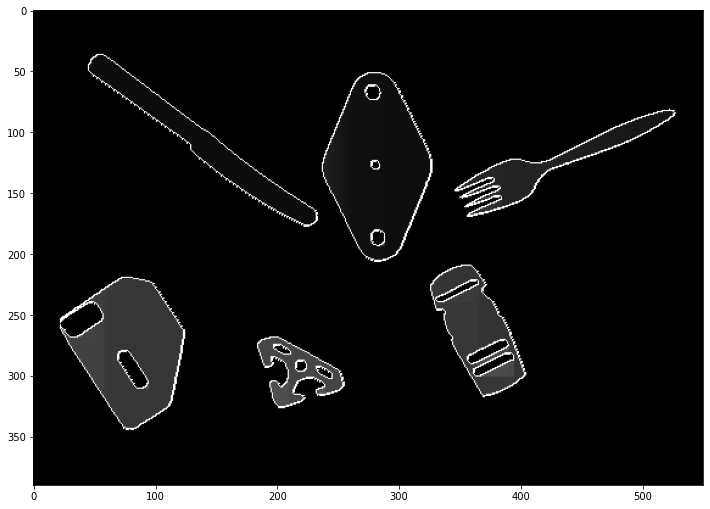

In [ ]:
33333334plt.imshow(bCopy, cmap='gray')
plt.show()

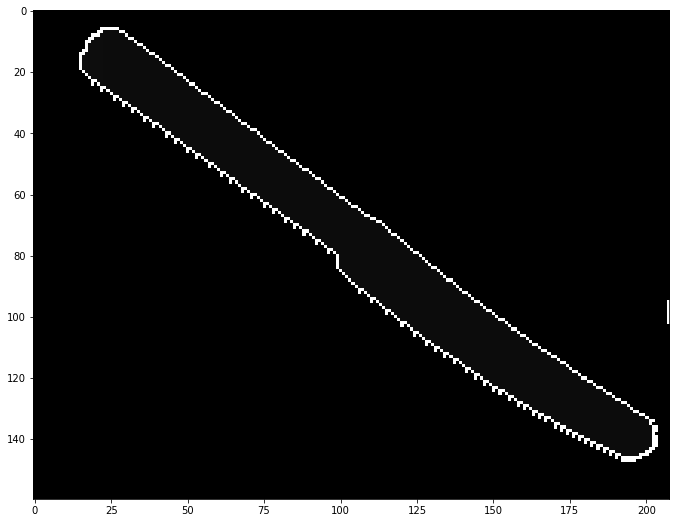

9
[   0.   50.   51.   52.   53.   54.   55.   56. 1000.]


In [ ]:
plt.imshow(bCopy[30:190, 30:238], cmap='gray')
plt.show()

print(len(np.unique(bCopy[30:190, 30:238])))
print(np.unique(bCopy[30:190, 30:238]))

In [ ]:
print(len(np.unique(bCopy)))
print(np.unique(bCopy))

272
[   0.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.  108.
  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.  120.
  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.  132.
  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.  144.
  145.  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.  156.
  157.  158.  159.  160.  161.  162.  163.  164.  165.  166.  167.  168.
  169.  170.  171.  172.  173.  174.  175.  176.  177.  178.  179.  180.
  181.  182.  183.  184.  185.  186.  187.  188.  189.  190.  191.  192.
  193.  194.  195.  196.  197.  198.  199.  200.  201.  202.  203.  204.
  205.  206.  207.  208.  209.  210.  211.  212

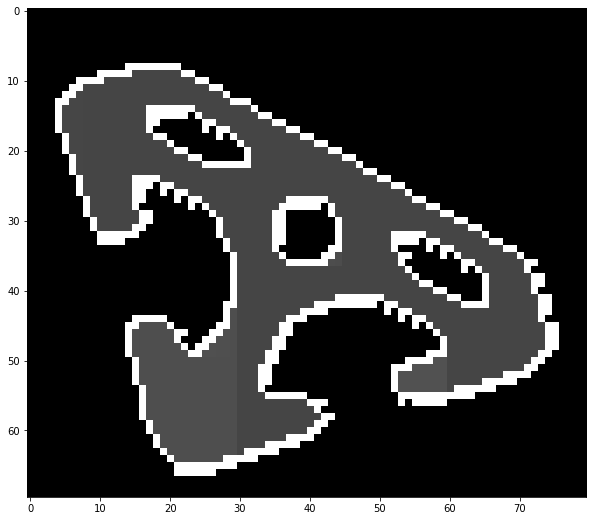

20
[   0.  270.  271.  272.  274.  275.  276.  299.  301.  307.  308.  309.
  310.  312.  313.  315.  317.  318.  319. 1000.]


In [ ]:
plt.imshow(bCopy[260:330, 180:260], cmap='gray')
plt.show()

print(len(np.unique(bCopy[260:340, 180:300])))
print(np.unique(bCopy[260:340, 180:250]))

In [ ]:
# input_list = [0, 1, 2]
# input_list = [1, 1, 1]
# if len(set(input_list)) == 1:
#   print(input_list)

In [ ]:
# bCopy.dtype

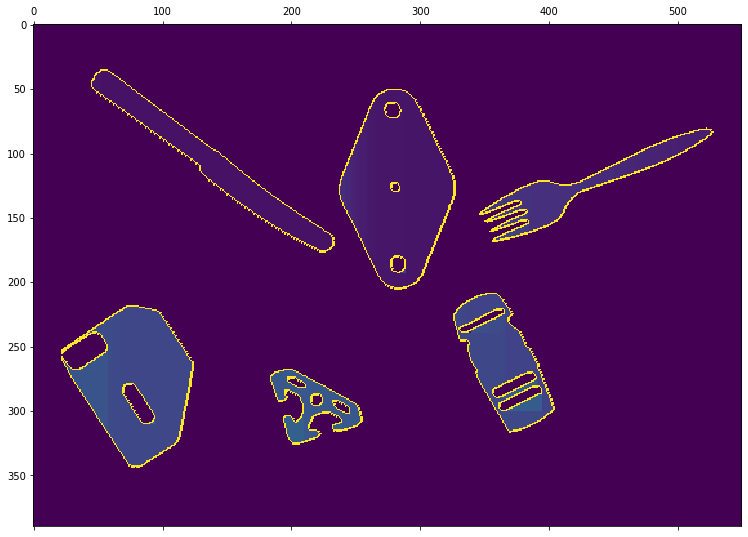

Found 270 objects in image.


In [ ]:
def label(b_img):
  """Label disconnected regions in a binary image.
  
  Args:
  - binary_img: H x W Boolean array representing a binary image where `False`
      indicates background while `True` indicates object regions.
  
  Returns:
  - label_img: H x W int array representing an image with labeled object
      regions where 0 indicates the background while other values represent
      object labels.
  """
  

  for i in range(b_img.shape[0]):
    for j in range(b_img.shape[1]):
      neighbors = []
      if i == 0 and j == 0:# top left corner
        continue
      elif i == 0:
        neighbors.append([b_img[i, j-1]])
      elif j == 0 and i != 0:
        neighbors.append([b_img[i-1, j]])
      elif i == b_img.shape[0]-1 and j == 0:# bottom left corner
        neighbors.append([b_img[i-1, j]])
      else:# all middle pixels
        neighbors.append([b_img[i, j-1], b_img[i-1, j], b_img[i-1, j-1]])

      checkZeros = [x for x in neighbors[0] if x == 0]
      checkOnes = [x for x in neighbors[0] if x == 1]
      if len(checkZeros) >= 1 and b_img[i, j] == 1:
        b_img[i, j] = 1000
      elif len(checkOnes) >= 1 and b_img[i, j] == 0:
        b_img[i-1, j] = 1000
        b_img[i, j-1] = 1000
        b_img[i-1, j-1] = 1000
      elif b_img[i, j] == 1:
        b_img[i, j] = 250

  label = 49
  for i in range(b_img.shape[0]):
    for j in range(b_img.shape[1]):
      neighbors = []
      if i == 0 and j == 0:
        continue
      elif i == 0:
        neighbors.append([b_img[i, j-1]])
      elif j == 0 and i != 0:
        neighbors.append([b_img[i-1, j]])
      elif i == b_img.shape[0]-1 and j == 0:
        neighbors.append([b_img[i-1, j]])
      else:
        neighbors.append([b_img[i, j-1], b_img[i-1, j], b_img[i-1, j-1]])

      if b_img[i, j] == 250 and len([x for x in neighbors[0] if x != 0 and x != 1000]) >= 1:
        old_labs = [x for x in neighbors[0] if x != 0 and x != 1000]
        b_img[i, j] = min(old_labs)
      elif b_img[i, j] == 250 and len([x for x in neighbors[0] if x == 1000]) >= 1:
        label += 1
        b_img[i, j] = label

  return b_img

label_img = label(binary_img)
plt.matshow(label_img)
plt.show()

obj_count = len(np.unique(label_img)) - 1
print(f"Found {obj_count} objects in image.")

### 1c. Calculate Geometric Attributes (10 points)

In the cell below, calculate the geometric attributes (center, orientation, second moment) of each object. A code snippet has been provided to visualize these attributes. To be specific, for each object, we mark the center of the object, and draws an ellipse having the same orientation and second moments around the center.

In [ ]:
from matplotlib.patches import Ellipse


def calculate_geometric_attributes(label_img, label):
    """Find the geometric attributes of an object in a labeled image.
    
    The origin of the coordinate system is at the top left corner of the image.
    The x axis points to the right. The y axis points down.
    
    Args:
    - label_img: H x W int array representing an image with labeled object
        regions where 0 indicates the background while other values represent
        object labels.
    - label: Label of the object for which we want to calculate the geometric
        attributes.
        
    Returns:
    - cx, cy: xy coordinates of the object center.
    - theta: Orientation of the object in radians.
    - emin, emax: Second moments of the object.
    """
    # TODO
    return cx, cy, theta, emin, emax

    
plt.imshow(img, cmap='gray')
labels = [l for l in np.unique(label_img) if l]
for label in labels:
    cx, cy, t, e1, e2 = calculate_geometric_attributes(label_img, label)
    
    # Visualization.
    # Plot the center of the area.
    plt.plot(cx, cy, marker='o', markersize=5, color=(1,0,0))
    # Plot an ellipse having the same orientation and second moments as the area.
    ew = 2 * ((4/np.pi)**(1/4)) * (e1**(-1/8)) * (e2**(3/8))
    eh = ew * np.sqrt(e1 / e2)
    plt.gca().add_patch(Ellipse((cx, cy), ew, eh, t*180/np.pi,
        facecolor='none', edgecolor=(1,0,0), linewidth=1))
plt.show()

## 2. Hough Transform

In this example you will implement the Hough transform to find coins in the sample image below.

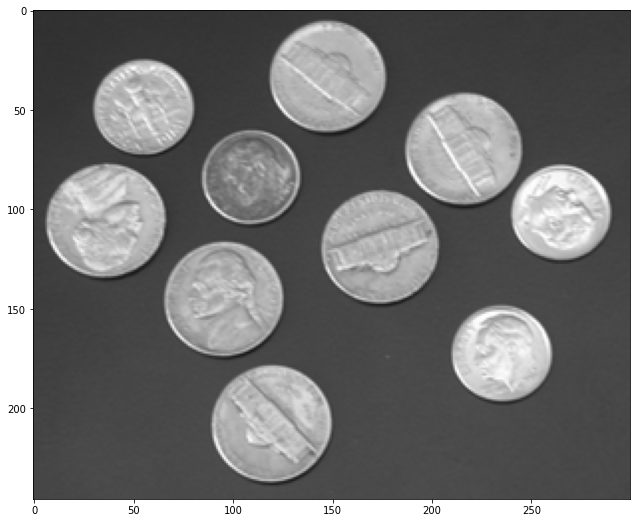

In [ ]:
img = cv2.imread('coins.png')
plt.imshow(img, cmap='gray')
plt.show()

### 2a. Edge Detection (10 points)

Detect edges in the sample image. Since you have implemented edge detection from scratch in the weekly notebook, here you can simply call `cv2.Canny()`. Pick your threshold values carefully so the edges of the coins are detected.

In [ ]:
thresh_l = img.min() + (img.mean())/5
thresh_u = img.max() - (img.mean())/5

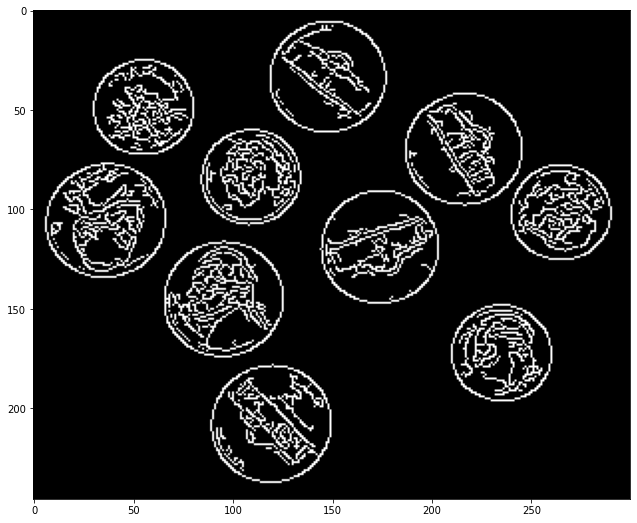

In [ ]:
edge_img = cv2.Canny(img, thresh_l, thresh_u)
plt.imshow(edge_img, cmap='gray')
plt.show()

### 2b. Hough Transform (30 points)

Implement the following function to detect circles using the Hough transform. The function should return the accumulator array instead of a list of circles.

For simplicity, your implementation can assume that all circles will be fully inside the image and will not be clipped by the image boundary.

In [ ]:
# def hough_circles(edge_img, radii):
#   """Find circles in an image containing edge pixels.
  
#   Args:
#   - edge_img: H x W uint8 edge image where 0 indicates non-edge pixels
#       whereas 255 indicates edge pixels.
#   - radii: A list of R radius values. Only circles whose radius is in this
#       list will be found.
  
#   Returns:
#   - score_map: R x W x H accumulator array. `score_map[r_idx, y, x]`
#       represents the total votes received by the circle of radius
#       radii[r_idx] centered at pixel `edge_img[y, x]`.
#   """
  
#   return score_map

# radii = np.arange(25., 31.)
# score_map = hough_circles(edge_img, radii)

In [ ]:
# https://developpaper.com/manual-implementation-of-hough-circle-transformation/

def detect_edges(image):
  h = image.shape[0]
  w = image.shape[1]
  sobeling = np.zeros((h, w), np.float64)
  sobelx = [[-3, 0, 3],
            [-10, 0, 10],
            [-3, 0, 3]]
  sobelx = np.array(sobelx)

  sobely = [[-3, -10, -3],
            [0, 0, 0],
            [3, 10, 3]]
  sobely = np.array(sobely)
  gx = 0
  gy = 0
  for i in range(1, h - 1):
    for j in range(1, w - 1):
      edgex = 0
      edgey = 0
      for k in range(-1, 2):
        for l in range(-1, 2):
          edgex += image[k + i, l + j] * sobelx[1 + k, 1 + l]
          edgey += image[k + i, l + j] * sobely[1 + k, 1 + l]
      gx = abs(edgex)
      gy = abs(edgey)
      sobeling[i, j] = gx + gy
          
  return sobeling

In [ ]:
def hough_circles(edge_image, edge_thresh, radii):
  """Find circles in an image containing edge pixels.
  
  Args:
  - edge_img: H x W uint8 edge image where 0 indicates non-edge pixels
      whereas 255 indicates edge pixels.
  - radii: A list of R radius values. Only circles whose radius is in this
      list will be found.
  
  Returns:
  - score_map: R x W x H accumulator array. `score_map[r_idx, y, x]`
      represents the total votes received by the circle of radius
      radii[r_idx] centered at pixel `edge_img[y, x]`.
  """

  h = edge_image.shape[0]
  w = edge_image.shape[1]
  edgimg = np.zeros((h, w), np.int64)
  for i in range(h):
    for j in range(w):
      if edge_image[i][j] > edge_thresh:
        edgimg[i][j] = 255
      else:
        edgimg[i][j] = 0

  accum_array = np.zeros((len(radii), h, w))
  for i in range(h):
    for j in range(w):
      if edgimg[i][j] != 0:
        for r in range(len(radii)):
          rr = radii[r]
          hdown = max(0, i - rr)
          for a in range(hdown, i):
            b = round(j+np.sqrt(rr*rr - (a - i) * (a - i)))
            if b >= 0 and b <= w-1:
              accum_array[r][a][b] += 1
              if 2 * i - a >= 0 and 2 * i - a <= h - 1:
                accum_array[r][2 * i - a][b] += 1
            if 2 * j - b >= 0 and 2 * j - b <= w - 1:
              accum_array[r][a][2 * j - b] += 1
            if 2 * i - a >= 0 and 2 * i - a <= h - 1 and 2 * j - b >= 0 and 2 * j - b <= w - 1:
              accum_array[r][2 * i - a][2 * j - b] += 1

  return edgimg, accum_array

In [ ]:
from copy import deepcopy

def find_circles(image, accum_array, radius_values, hough_thresh):
  returnlist = []
  hlist = []
  wlist = []
  rlist = []
  returnimg = deepcopy(image)
  for r in range(accum_array.shape[0]):
    for h in range(accum_array.shape[1]):
      for w in range(accum_array.shape[2]):
        if accum_array[r][h][w] > hough_thresh:
          tmp = 0
          for i in range(len(hlist)):
            if abs(w-wlist[i])<10 and abs(h-hlist[i])<10:
              tmp = 1
              break

          if tmp == 0:
            rr = radius_values[r]
            flag = '(h,w,r)is:(' + str(h) + ',' + str(w) + ',' + str(rr) + ')'
            returnlist.append(flag)
            hlist.append(h)
            wlist.append(w)
            rlist.append(rr)

  for i in range(len(hlist)):
    center = (wlist[i], hlist[i])
    rr = rlist[i]

    color = (0, 255, 0)
    thickness = 2
    cv2.circle(returnimg, center, rr, color, thickness)

  return returnlist, returnimg

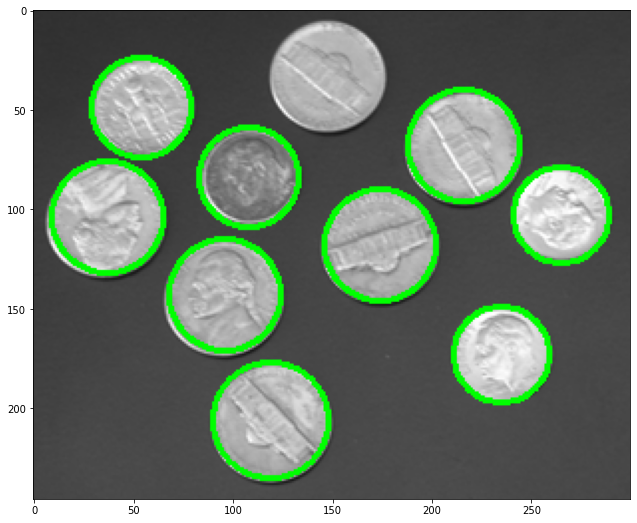

In [ ]:
img1 = detect_edges(edge_img)
thresh = 1500
radii = np.arange(20, 30)
edgeimg, score_map = hough_circles(img1, thresh, radii)

hough_thresh = 90
res_list, res_img = find_circles(img, score_map, radii, hough_thresh)

plt.imshow(res_img, cmap='gray')
plt.show()

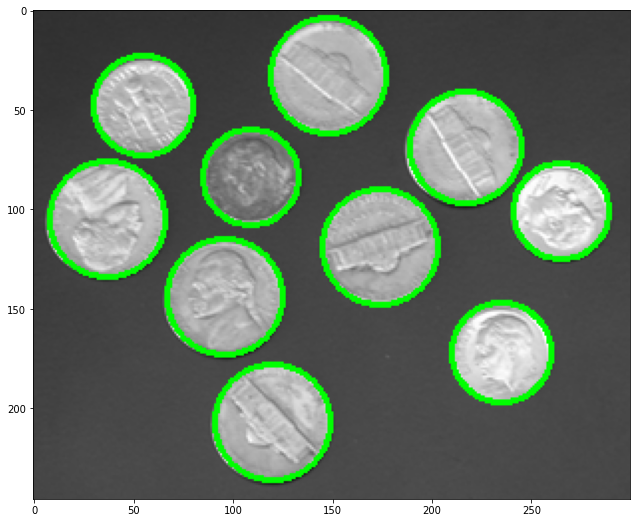

In [ ]:
img = cv2.imread('coins.png', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = detect_edges(gray_image)

thresh = 1500
radius_values = []
for i in range(10):
  radius_values.append(20 + i)

eimg, score_map = hough_circles(img1, thresh, radius_values)

hough_thresh = 70
res_list, res_img = find_circles(img, score_map, radius_values, hough_thresh)

plt.imshow(res_img, cmap='gray')
plt.show()

In [ ]:
score_map.shape

(10, 246, 300)

Visualize the score map (accumulator array) corresponding to `radii[0]`.

In [ ]:
score_map[0, :, :]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

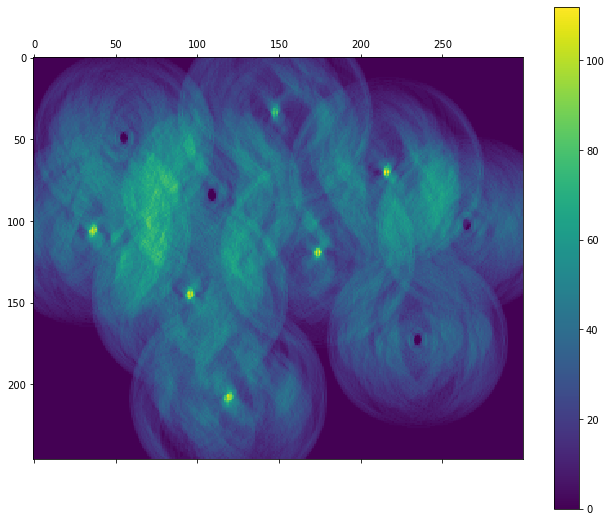

In [ ]:
plt.matshow(score_map[9, :, :])
plt.colorbar()
plt.show()

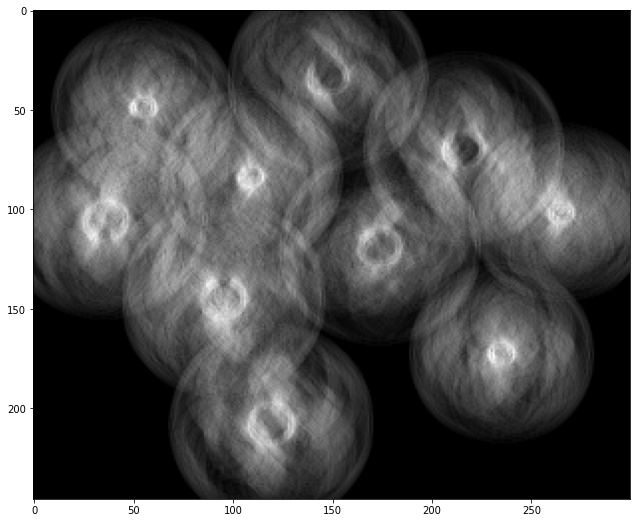

In [ ]:
plt.imshow(score_map[0, :, :], cmap='gray')
plt.show()

From the accumulator array, pick the top scoring circles and display them. It is fine (and expected) if you detect multiple circles for a single coin. We will address this in the next section.

In [ ]:
from matplotlib.patches import Circle

plt.imshow(img, cmap='gray')
ris, ys, xs = 
for ri, y, x in (ris, ys, xs):
  r = radii[ri]
  plt.gca().add_patch(Circle((x, y), r, facecolor='none', edgecolor=(0,1,0), linewidth=2))
plt.show()

### 2c. Non-Maximum Suppression (10 points)

You may have observed that your results in the last section contain duplicate detections if you want to detect all coins. This is quite common in detection systems including the neural network detectors that we will cover in the second half of this course. A post-processing step called non-maximum suppression is often needed to remove these duplicate detections. In our case, if two circles overlap with each other too much, we can assume they are duplicate detections and discard the one with lower votes. For the entire list of detections, we could sort them based on votes and repeat this process to suppress duplicate detections.

In the cell below, implement this process and plot the results after post-processing. The final results should contain all coins without duplicates.

##The provided solution contained a version of hough transform without voting. The printout of predicted circles contains unique circles. 